<a href="https://colab.research.google.com/github/leshamoore/wildfire-detection/blob/main/fire_russia_statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import mannwhitneyu
from plotly import graph_objects as go
import plotly.express as px
import scipy.stats as stats
import math as mth
import scipy.stats as st
warnings.filterwarnings("ignore")
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('dark_background')

In [ ]:
path="/out.csv"
data=pd.read_csv(path)
data

,dt,lat,lon,temp,humidity,windspeed,precipcover,fire,region
0,2012-03-08,48.4973,131.9871,-4.6,86.8,7.8,8.33,0,Far Eastern Federal District
1,2012-03-09,48.4973,131.9871,-4.6,87.2,7.2,4.17,0,Far Eastern Federal District
2,2012-03-10,48.4973,131.9871,-4.2,82.8,7.8,0.00,0,Far Eastern Federal District
3,2012-03-11,48.4973,131.9871,-2.9,72.9,13.3,0.00,0,Far Eastern Federal District
4,2012-03-12,48.4973,131.9871,-3.7,70.9,15.0,0.00,0,Far Eastern Federal District
...,...,...,...,...,...,...,...,...,...
4345,2015-04-10,48.5778,131.8888,2.6,86.2,11.0,8.33,0,Far Eastern Federal District
4346,2015-04-11,48.5778,131.8888,5.1,82.0,10.7,8.33,0,Far Eastern Federal District
4347,2015-04-12,48.5778,131.8888,6.6,55.7,19.0,4.17,0,Far Eastern Federal District
4348,2015-04-13,48.5778,131.8888,11.1,43.7,22.9,0.00,0,Far Eastern Federal District


FIRE:
1= Был пожар.
0=Пожара не было.

In [ ]:
display(data.describe())
display(data.shape)
display(data.dtypes)
display(data.info())

print('Количество дубликатов:')
print(data.duplicated().sum())

print('Количество пропусков по столбцам:')
print(data.isna().sum())

,lat,lon,temp,humidity,windspeed,precipcover,fire
count,4350.000000,4350.00000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000
mean,55.034128,123.49194,18.067931,63.830897,15.731632,6.245441,0.166667
std,5.933371,16.86199,8.233712,13.352317,8.039249,14.556450,0.372721
min,42.741600,31.07250,-7.200000,21.600000,4.300000,0.000000,0.000000
25%,51.690400,114.21110,12.700000,55.725000,10.100000,0.000000,0.000000
50%,53.804200,127.33270,19.600000,64.500000,13.900000,0.000000,0.000000
75%,60.314000,133.13730,24.300000,73.200000,19.400000,4.170000,0.000000
max,69.371700,171.99680,36.000000,98.600000,64.500000,100.000000,1.000000


(4350, 9)

,0
dt,object
lat,float64
lon,float64
temp,float64
humidity,float64
windspeed,float64
precipcover,float64
fire,int64
region,object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           4350 non-null   object 
 1   lat          4350 non-null   float64
 2   lon          4350 non-null   float64
 3   temp         4350 non-null   float64
 4   humidity     4350 non-null   float64
 5   windspeed    4350 non-null   float64
 6   precipcover  4350 non-null   float64
 7   fire         4350 non-null   int64  
 8   region       4350 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 306.0+ KB


None

Количество дубликатов:
0
Количество пропусков по столбцам:
dt             0
lat            0
lon            0
temp           0
humidity       0
windspeed      0
precipcover    0
fire           0
region         0
dtype: int64


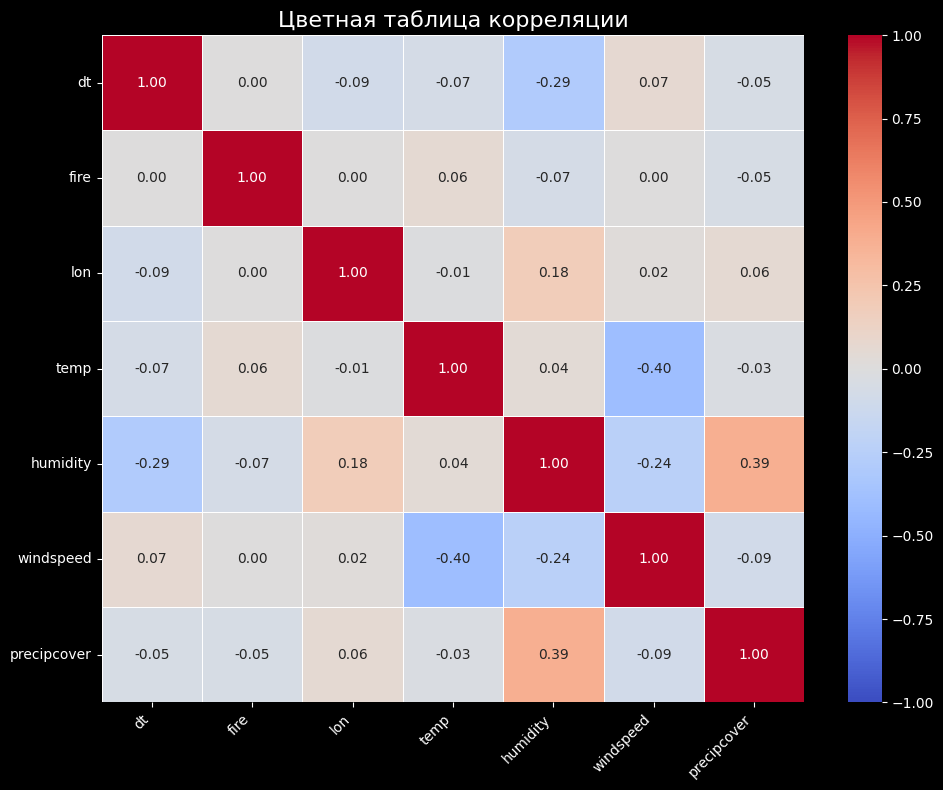

In [ ]:
# Преобразуем столбец с датами в тип datetime
# Преобразуем столбец с датами в тип datetime
data['dt'] = pd.to_datetime(data['dt'])

numeric_columns = ['dt', 'fire', 'lon', 'temp', 'humidity', 'windspeed', 'precipcover',]
numeric_data = data[numeric_columns]

# Вычисляем корреляцию
correlation_matrix = numeric_data.corr()

# Округляем значения до двух знаков после запятой
correlation_matrix_rounded = correlation_matrix.round(2)

# Создаем цветную таблицу корреляции (heatmap)
plt.figure(figsize=(10, 8))  # Размер графика
sns.heatmap(
    correlation_matrix_rounded,  # Округленная матрица корреляции
    annot=True,  # Отображаем значения в ячейках
    fmt=".2f",  # Формат чисел: два знака после запятой
    cmap="coolwarm",  # Цветовая схема
    vmin=-1,  # Минимальное значение для цветовой шкалы
    vmax=1,  # Максимальное значение для цветовой шкалы
    linewidths=0.5,  # Толщина линий между ячейками
    annot_kws={"size": 10}  # Размер шрифта для аннотаций
)

# Настройки графика
plt.title("Цветная таблица корреляции", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X
plt.yticks(rotation=0)  # Подписи оси Y без поворота
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

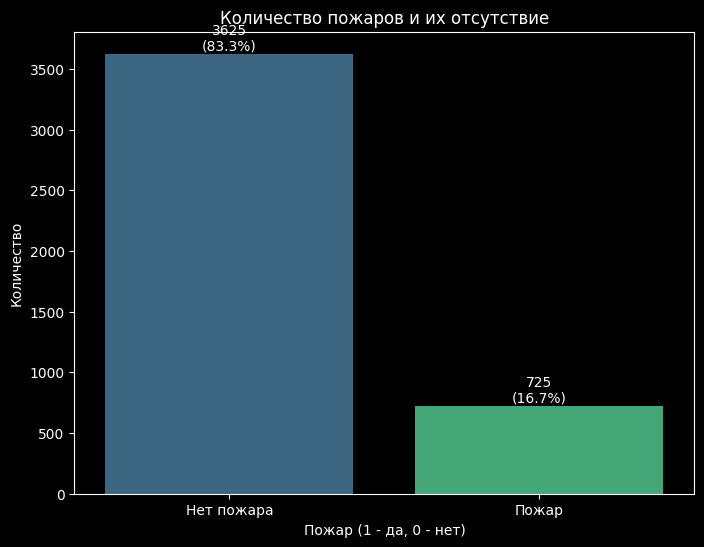

In [ ]:
fire_counts = data['fire'].value_counts()
total = fire_counts.sum()
percentages = (fire_counts / total) * 100

# Визуализация
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=fire_counts.index, y=fire_counts.values, palette="viridis")

# Добавляем подписи с количеством и долей
for i, (count, percent) in enumerate(zip(fire_counts.values, percentages)):
    ax.text(i, count + 5, f"{count}\n({percent:.1f}%)", ha='center', va='bottom')

plt.title("Количество пожаров и их отсутствие")
plt.xlabel("Пожар (1 - да, 0 - нет)")
plt.ylabel("Количество")
plt.xticks([0, 1], ['Нет пожара', 'Пожар'])
plt.show()

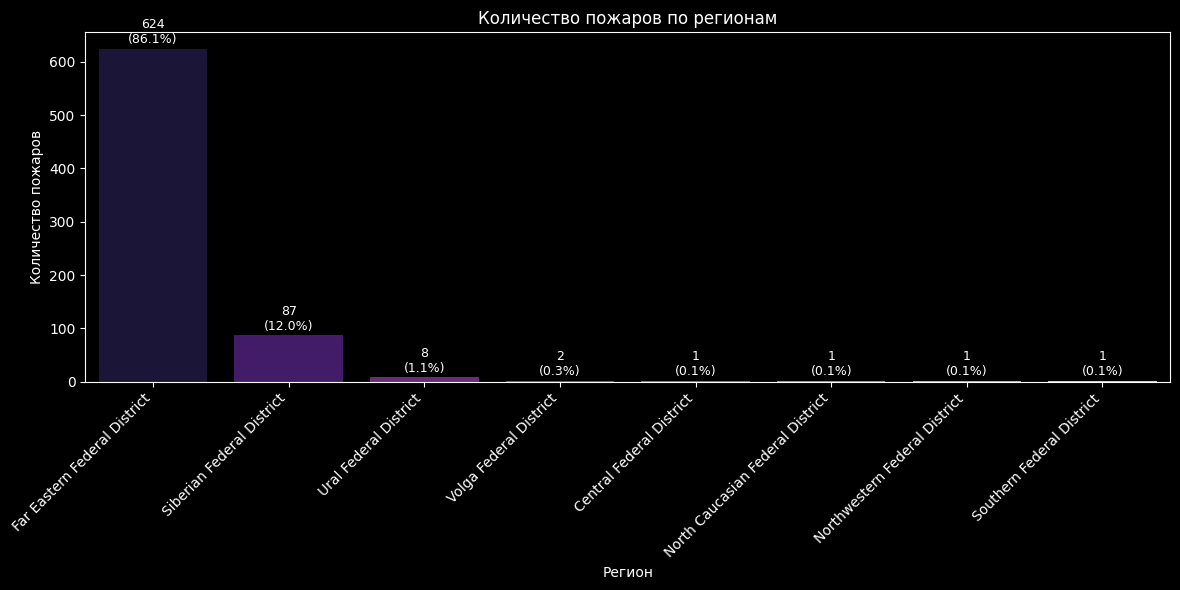

In [ ]:
# Группируем по региону и считаем количество пожаров
fires_by_region = data[data['fire'] == 1].groupby('region').size().sort_values(ascending=False)
total_fires = fires_by_region.sum()
percentages = (fires_by_region / total_fires) * 100

# Визуализация
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=fires_by_region.index, y=fires_by_region.values, palette="magma")

# Добавляем подписи с количеством и долей
for i, (count, percent) in enumerate(zip(fires_by_region.values, percentages)):
    ax.text(i, count + 5, f"{count}\n({percent:.1f}%)", ha='center', va='bottom', fontsize=9)

plt.title("Количество пожаров по регионам")
plt.xlabel("Регион")
plt.ylabel("Количество пожаров")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

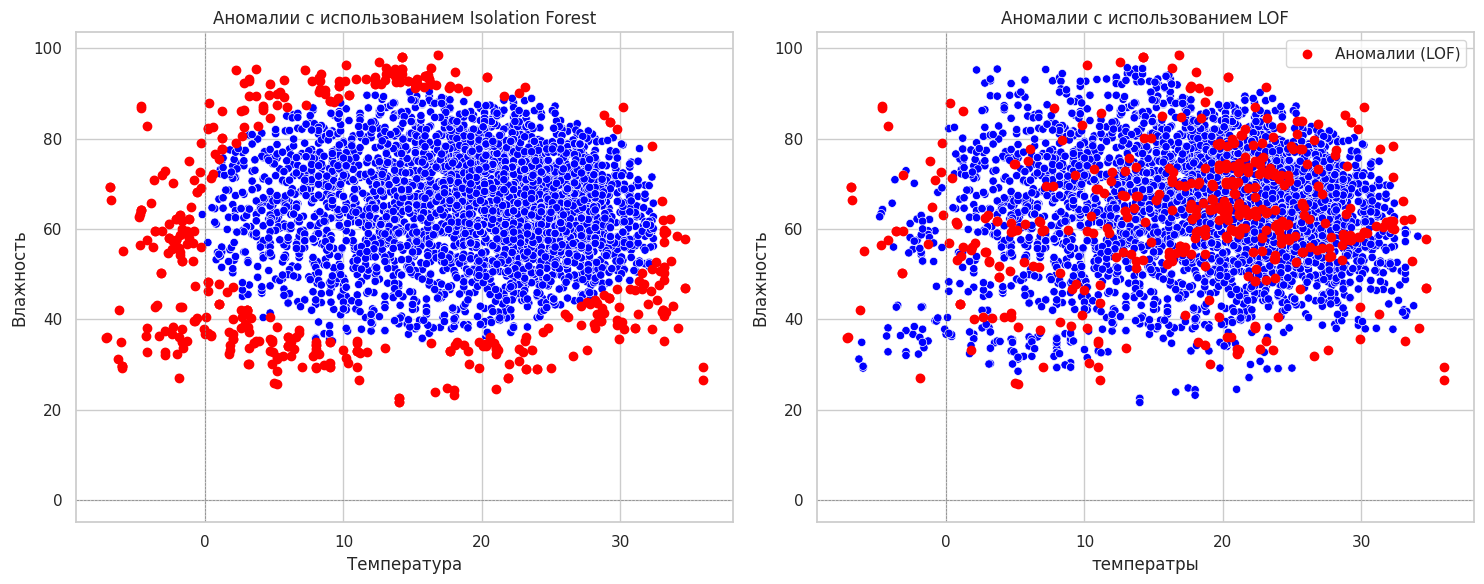

In [28]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# 3. Машинное обучение
iso_forest = IsolationForest(contamination=0.1, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['temp', 'humidity']])
anomalies = data[data['anomaly'] == -1]


lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
data['anomaly_lof'] = lof.fit_predict(data[['temp', 'humidity']])
anomalies_lof = data[data['anomaly_lof'] == -1]


# Визуализация
plt.figure(figsize=(15, 6))

# Графыыыык для Isolation Forest
plt.subplot(1, 2, 1)
sns.scatterplot(x='temp', y='humidity', data=data, hue='anomaly', palette={1: 'blue', -1: 'red'}, legend=False)
plt.scatter(anomalies['temp'], anomalies['humidity'], color='red', label='Аномалии (Isolation Forest)')
plt.title('Аномалии с использованием Isolation Forest')
plt.xlabel('Температура')
plt.ylabel('Влажность')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')

# Графикс для Local Outlier Factor
plt.subplot(1, 2, 2)
sns.scatterplot(x='temp', y='humidity', data=data, hue='anomaly_lof', palette={1: 'blue', -1: 'red'}, legend=False)
plt.scatter(anomalies_lof['temp'], anomalies_lof['humidity'], color='red', label='Аномалии (LOF)')
plt.title('Аномалии с использованием LOF')
plt.xlabel('температры')
plt.ylabel('Влажность')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')

plt.legend()
plt.tight_layout()
plt.show()

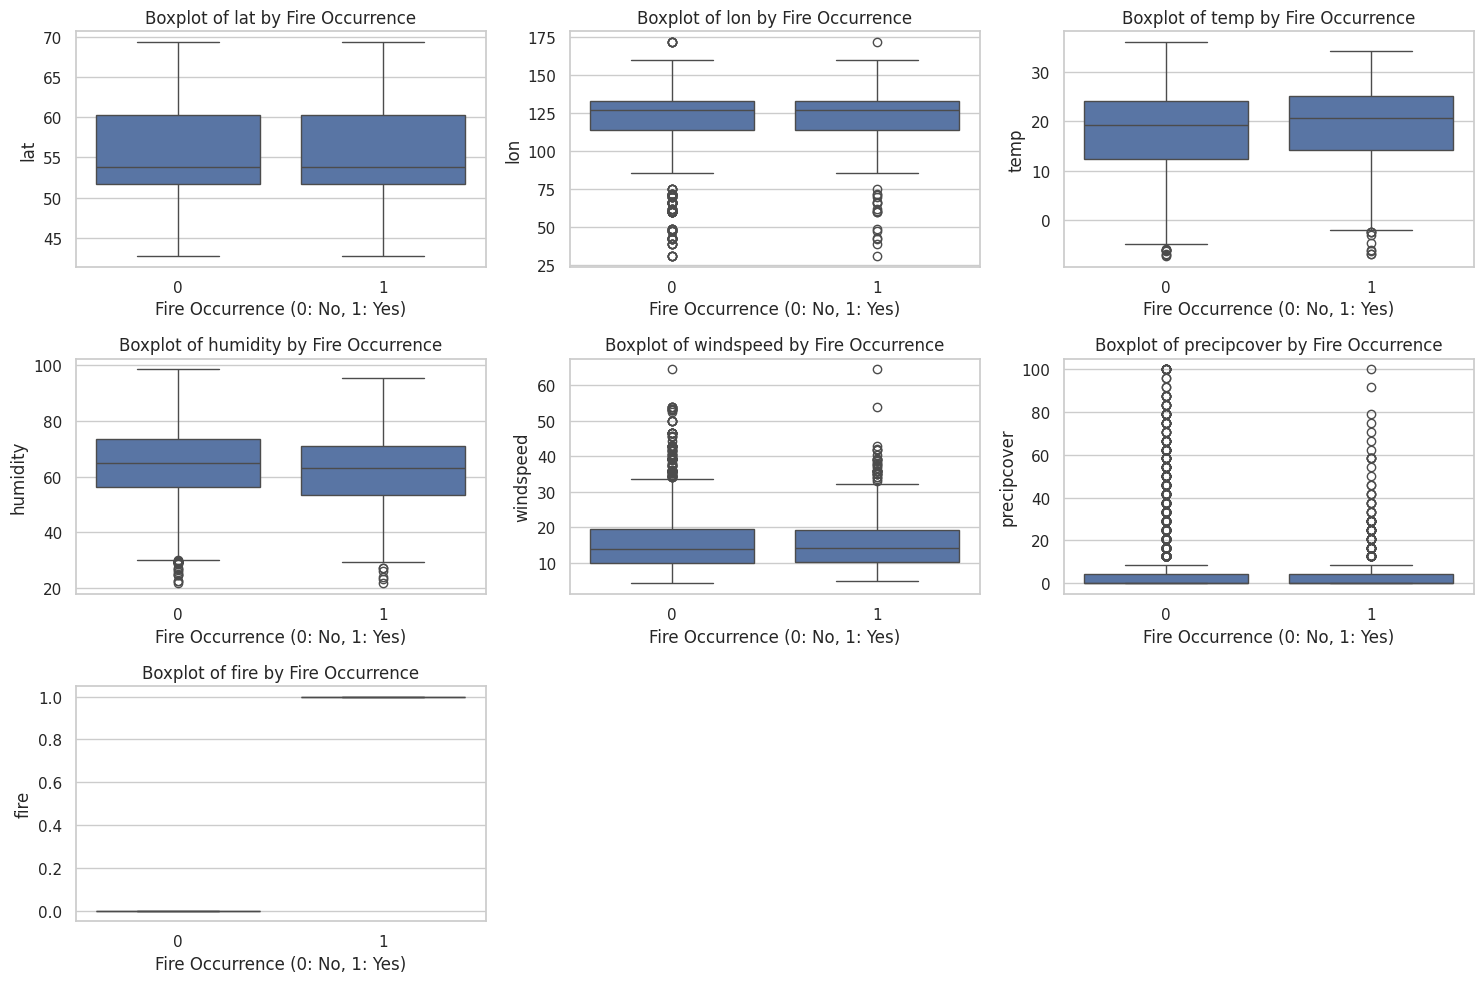

In [ ]:


# Установим стиль графиков
sns.set(style="whitegrid")

# Создадим список столбцов для построения boxplot
columns_to_plot = ['lat', 'lon', 'temp', 'humidity', 'windspeed', 'precipcover', 'fire']

# Создаем подграфики
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)  # 3 строки и 3 столбца подграфиков
    sns.boxplot(x='fire', y=column, data=data)
    plt.title(f'Boxplot of {column} by Fire Occurrence')
    plt.xlabel('Fire Occurrence (0: No, 1: Yes)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()